Connected to tracking-barbell-exercises (Python 3.8.15)

In [1]:
import sys
sys.path.append("../../src")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Plot settings
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2

In [2]:
# --------------------------------------------------------------
# Load data
# --------------------------------------------------------------
df_cluster = pd.read_pickle("../../data/interim/for_experiments_with_KMeans.pkl")

# --------------------------------------------------------------
# Clustering
# --------------------------------------------------------------
# ELBOW TECHNIQUE
# Finding the optimal number of clusters by plotting a figure
# "Number of clusters - Sum of squared distances" and using the "elbow" technique

cluster_columns = ["acc_x", "acc_y", "acc_z"]
k_values = range(2, 10)
inertias = []

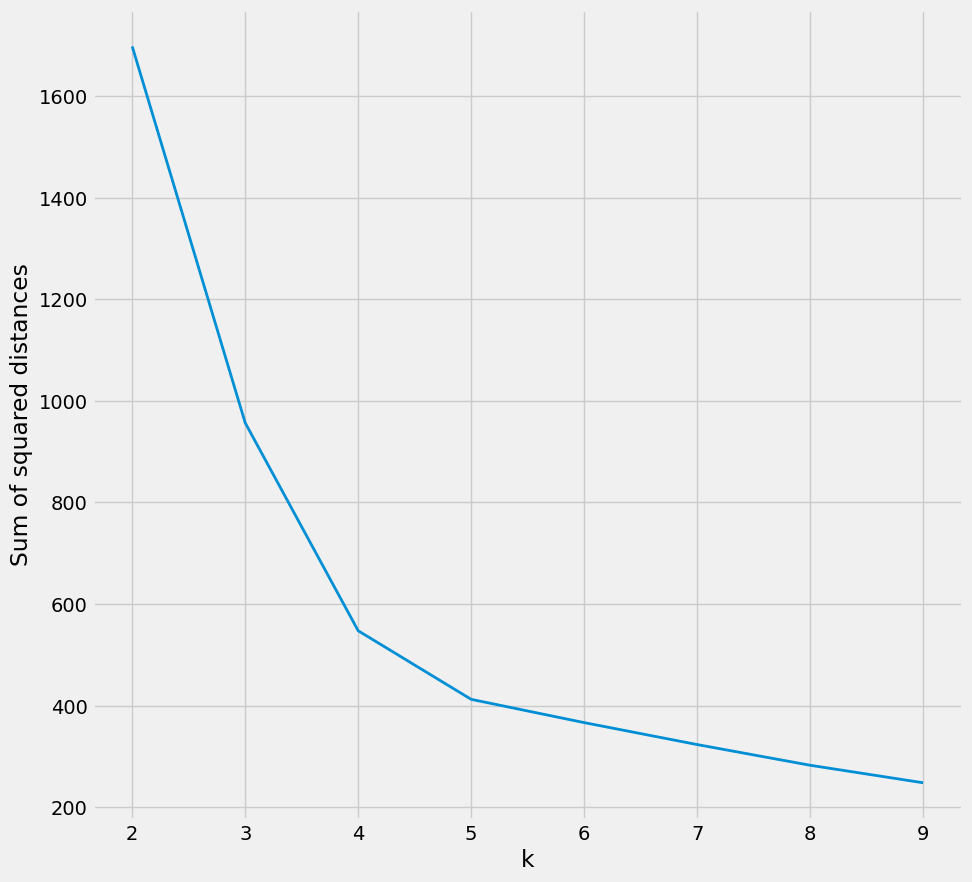

In [3]:
for k in k_values:
    subset = df_cluster[cluster_columns]
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=0)
    cluster_labels = kmeans.fit_predict(subset)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 10))
plt.plot(k_values, inertias)
plt.xlabel("k")
plt.ylabel("Sum of squared distances")
plt.show()

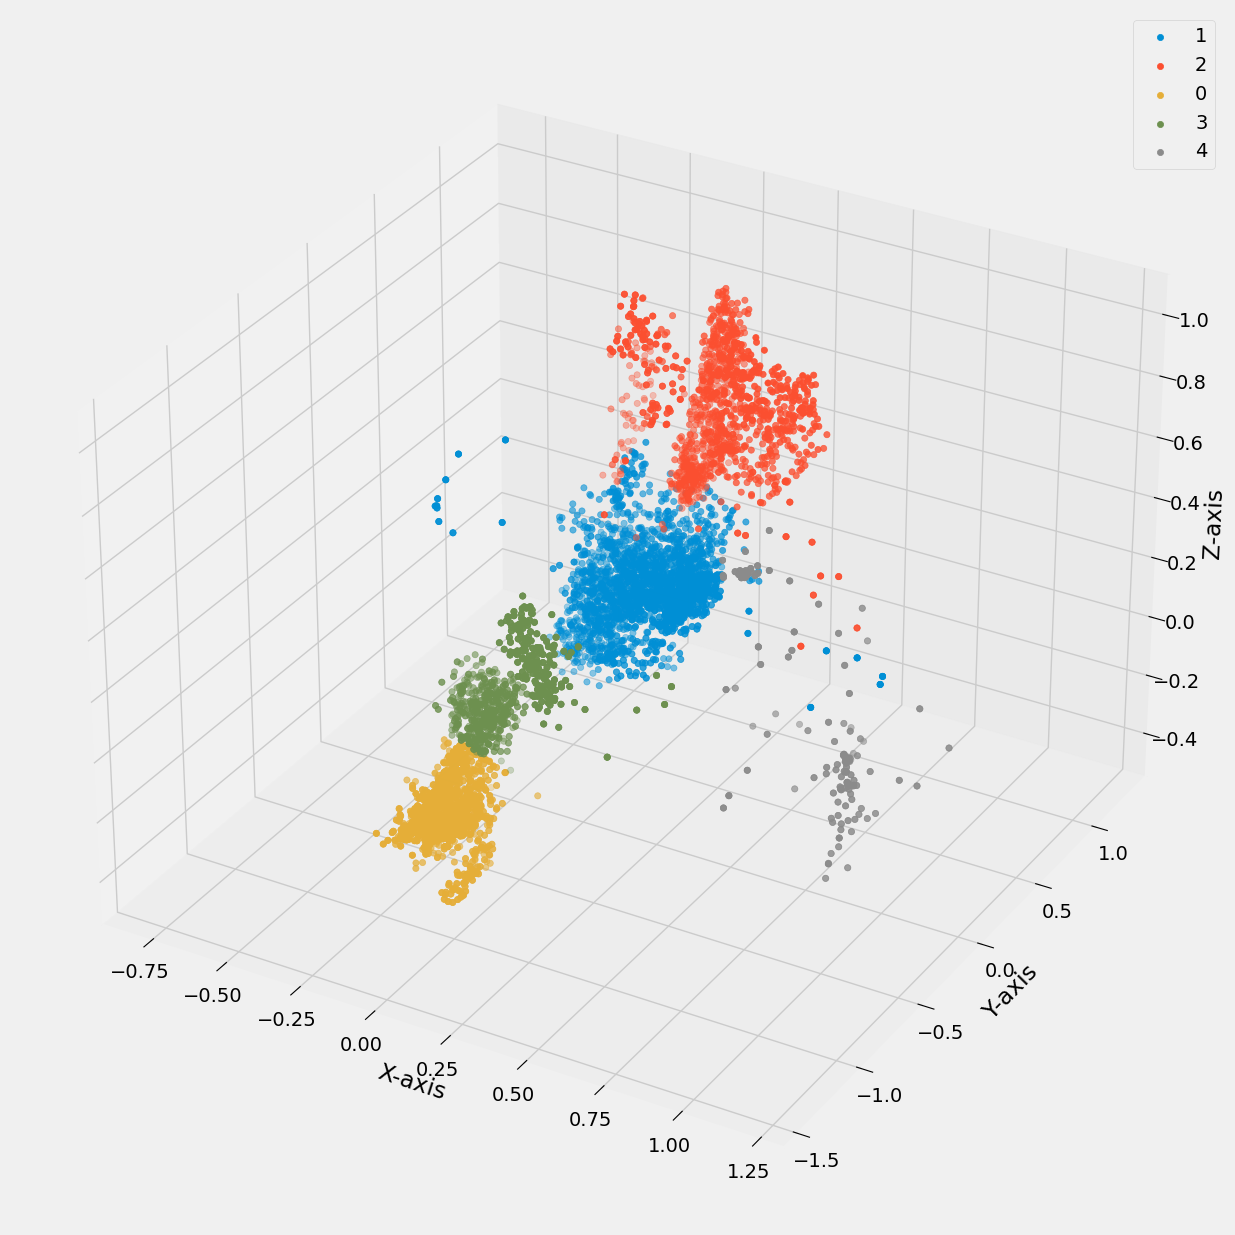

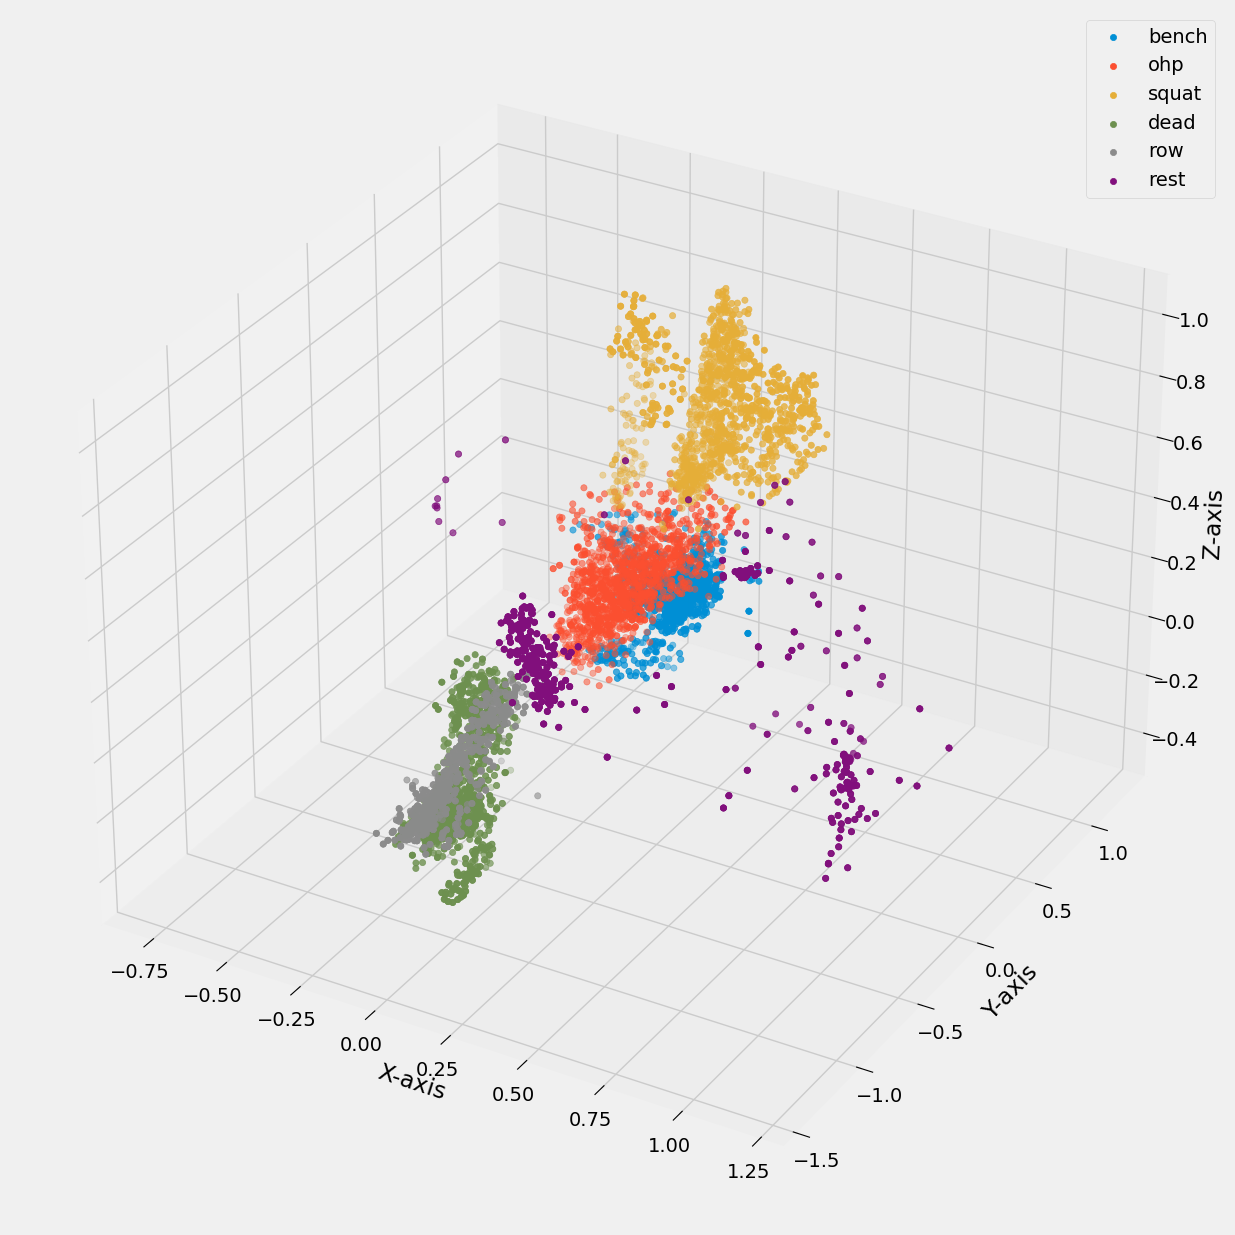

In [4]:
k = 5  # number of clusters
kmeans = KMeans(n_clusters=k, n_init=20, random_state=0)
subset = df_cluster[cluster_columns]
df_cluster["cluster"] = kmeans.fit_predict(subset)

# Plot clusters
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection="3d")
for c in df_cluster["cluster"].unique():
    subset = df_cluster.query("cluster == @c")
    ax.scatter(subset["acc_x"], subset["acc_y"], subset["acc_z"], label=c)

ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.legend()
plt.show()

# Plot accelerometer data to compare
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection="3d")
for l in df_cluster["label"].unique():
    subset = df_cluster.query("label == @l")
    ax.scatter(subset["acc_x"], subset["acc_y"], subset["acc_z"], label=l)

ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.legend()
plt.show()